In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

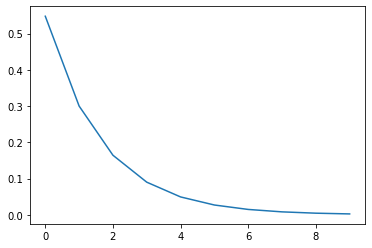

In [58]:
beta = np.array([0.7] * 10)
alpha = 1 - beta
alpha_bar = np.cumprod(alpha)
plt.plot(np.sqrt(alpha_bar))

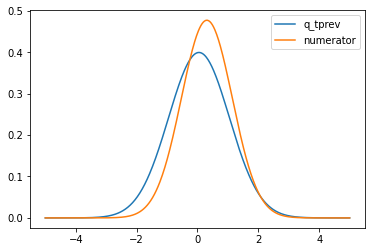

In [68]:
t = 5
tprev = t - 1

x0 = 1
# eval x_tprev 
x_tprev = np.linspace(-5, 5, 500)
# x_t can be anyvalue
x_t = 0.5

# q_tprev = N(sqrt(alpha_bar) * x0, (1 - alpha_bar) * 1)
q_tprev = norm(np.sqrt(alpha_bar[tprev]) * x0, np.sqrt(1 - alpha_bar[tprev]))
# eval at x_t-1 = q_t-1(x_t-1)
q_tprev = q_tprev.pdf(x_tprev)
plt.plot(x_tprev, q_tprev)

# q_t|t-1 = N(sqrt(1-beta_t) x_tprev, beta_t * 1)
q_ttprev = norm(np.sqrt(1 - beta[tprev]) * x_tprev, np.sqrt(beta[tprev]))
# eval at x_t = q_t|t-1(x_t)
q_ttprev = q_ttprev.pdf(x_t)

# q_t = N(sqrt(alpha_bar) * x0, (1 - alpha_bar) * 1)
q_t = norm(np.sqrt(alpha_bar[t]) * x0, np.sqrt(1 - alpha_bar[t]))
q_t = q_t.pdf(x_t)

# plt.plot(x_tprev, q_ttprev)
plt.plot(x_tprev, q_ttprev * q_tprev / q_t)
plt.legend(['q_tprev', 'numerator'])